* used the 1998 Movie Lens data set from https://grouplens.org/datasets/movielens/100k/
* genres came one hot encoded so only occupation and gender needed to be feature engineered
* utilized random forest to confirm that this model would be a poor predictor when compared to recommender models

In [1]:
# import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing the ratings file
r_cols = ["user_id", "item_id", "rating", "timestamp"]
ratings = pd.read_csv('../ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# importing the users file
u_cols = ["user_id", "age", "gender", "occupation", "zip code"]
users = pd.read_csv('../ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')
users.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# merge users and ratings
df = pd.merge(ratings, users, on="user_id")
df.sort_values("user_id").head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711


In [5]:
df["occupation"].describe()

count      100000
unique         21
top       student
freq        21957
Name: occupation, dtype: object

In [6]:
# LabelEncoder to feature engineer gender and occupation

le = preprocessing.LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['occupation'] = le.fit_transform(df['occupation'])


In [7]:
# use drop to get remaining features
data = df.drop(['timestamp', 'zip code'],axis=1, inplace=True)

In [8]:
data = df.apply(pd.to_numeric) 

# what we are attempting to predict
target = df["rating"]

In [9]:
# creating the features or x values
data.drop(["rating"],axis=1, inplace=True)

In [10]:
feature_names = data.columns
data.head()

,user_id,item_id,age,gender,occupation
0,196,242,49,1,20
1,196,393,49,1,20
2,196,381,49,1,20
3,196,251,49,1,20
4,196,655,49,1,20


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [12]:
# 33.556% accuracy - not a good predicter like we expected
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.33548

In [13]:
importances = rf.feature_importances_
importances

array([0.1495555 , 0.68699929, 0.09878805, 0.00842746, 0.05622971])

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6869992866996614, 'item_id'),
 (0.14955549978195865, 'user_id'),
 (0.09878805057640135, 'age'),
 (0.05622970692941175, 'occupation'),
 (0.00842745601256666, 'gender')]

No handles with labels found to put in legend.


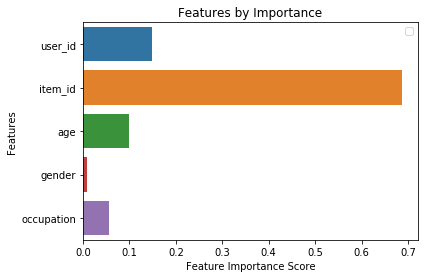

In [15]:
# plotting feature importance
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.savefig("images/RF1998LE.png")
plt.show()